In [20]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from mlxtend.plotting import plot_decision_regions
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import matplotlib.pyplot as plt

import seaborn as sns

#Loading the dataset
carseats_df = pd.read_csv('/Users/smileloukkade/Downloads/Concordia/MSCA 681/Datasets-20251004/Carseats.csv')

print(carseats_df.head())

   Unnamed: 0  Sales  CompPrice  Income  Advertising  Population  Price  \
0           1   9.50        138      73           11         276    120   
1           2  11.22        111      48           16         260     83   
2           3  10.06        113      35           10         269     80   
3           4   7.40        117     100            4         466     97   
4           5   4.15        141      64            3         340    128   

  ShelveLoc  Age  Education Urban   US  
0       Bad   42         17   Yes  Yes  
1      Good   65         10   Yes  Yes  
2    Medium   59         12   Yes  Yes  
3    Medium   55         14   Yes  Yes  
4       Bad   38         13   Yes   No  


# **A. Data Preparation and Exploration**

## A1.1: Explore and visualize the dataset. Look into dataset structure, missing values, summary statistics.

In [21]:
carseats_df = pd.read_csv('/Users/smileloukkade/Downloads/Concordia/MSCA 681/Datasets-20251004/Carseats.csv')

# Data Structure 
print('\n1. BASIC DATASET INFO:')
print(f'Dataset shape: {carseats_df.shape}')
print(f'Dataset rows: {carseats_df.shape[0]}')
print(f'Dataset columns: {carseats_df.shape[1]}')

print('\n2. COLUMN INFORMATION:')
print(carseats_df.info())
numeric_variables = ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']
categorical_variables = ['ShelveLoc', 'Urban', 'US']
print("Numerical Variables Columns:", numeric_variables)
print("Categorical Variables Columns:", categorical_variables)

print('\n3. DATA TYPES:')
print(carseats_df.dtypes)

# Missing Value 
print('\n4. MISSING VALUES COUNT:')
missing_values = carseats_df.isnull().sum() 
print(missing_values)

# Looking into the categorical values
print('\n5. CATEGORICAL VALUES:')
for col in categorical_variables:
  print(f"\nValue counts for {col}:")
  print(carseats_df[col].value_counts())  

# Summary statistics 
print('\n6. SUMMARY STATISTICS:')
carseats_df.describe()


1. BASIC DATASET INFO:
Dataset shape: (400, 12)
Dataset rows: 400
Dataset columns: 12

2. COLUMN INFORMATION:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   400 non-null    int64  
 1   Sales        400 non-null    float64
 2   CompPrice    400 non-null    int64  
 3   Income       400 non-null    int64  
 4   Advertising  400 non-null    int64  
 5   Population   400 non-null    int64  
 6   Price        400 non-null    int64  
 7   ShelveLoc    400 non-null    object 
 8   Age          400 non-null    int64  
 9   Education    400 non-null    int64  
 10  Urban        400 non-null    object 
 11  US           400 non-null    object 
dtypes: float64(1), int64(8), object(3)
memory usage: 37.6+ KB
None
Numerical Variables Columns: ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']
Categori

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,115.614301,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,1.000000,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,100.750000,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,200.500000,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,300.250000,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,400.000000,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


## A1.2: Data Visualization with 5 histograms, 5 box plots, 5 bar charts, 5 scatterplots using the numerical and categorical input variables and the output variable in your dataset.

### Histograms

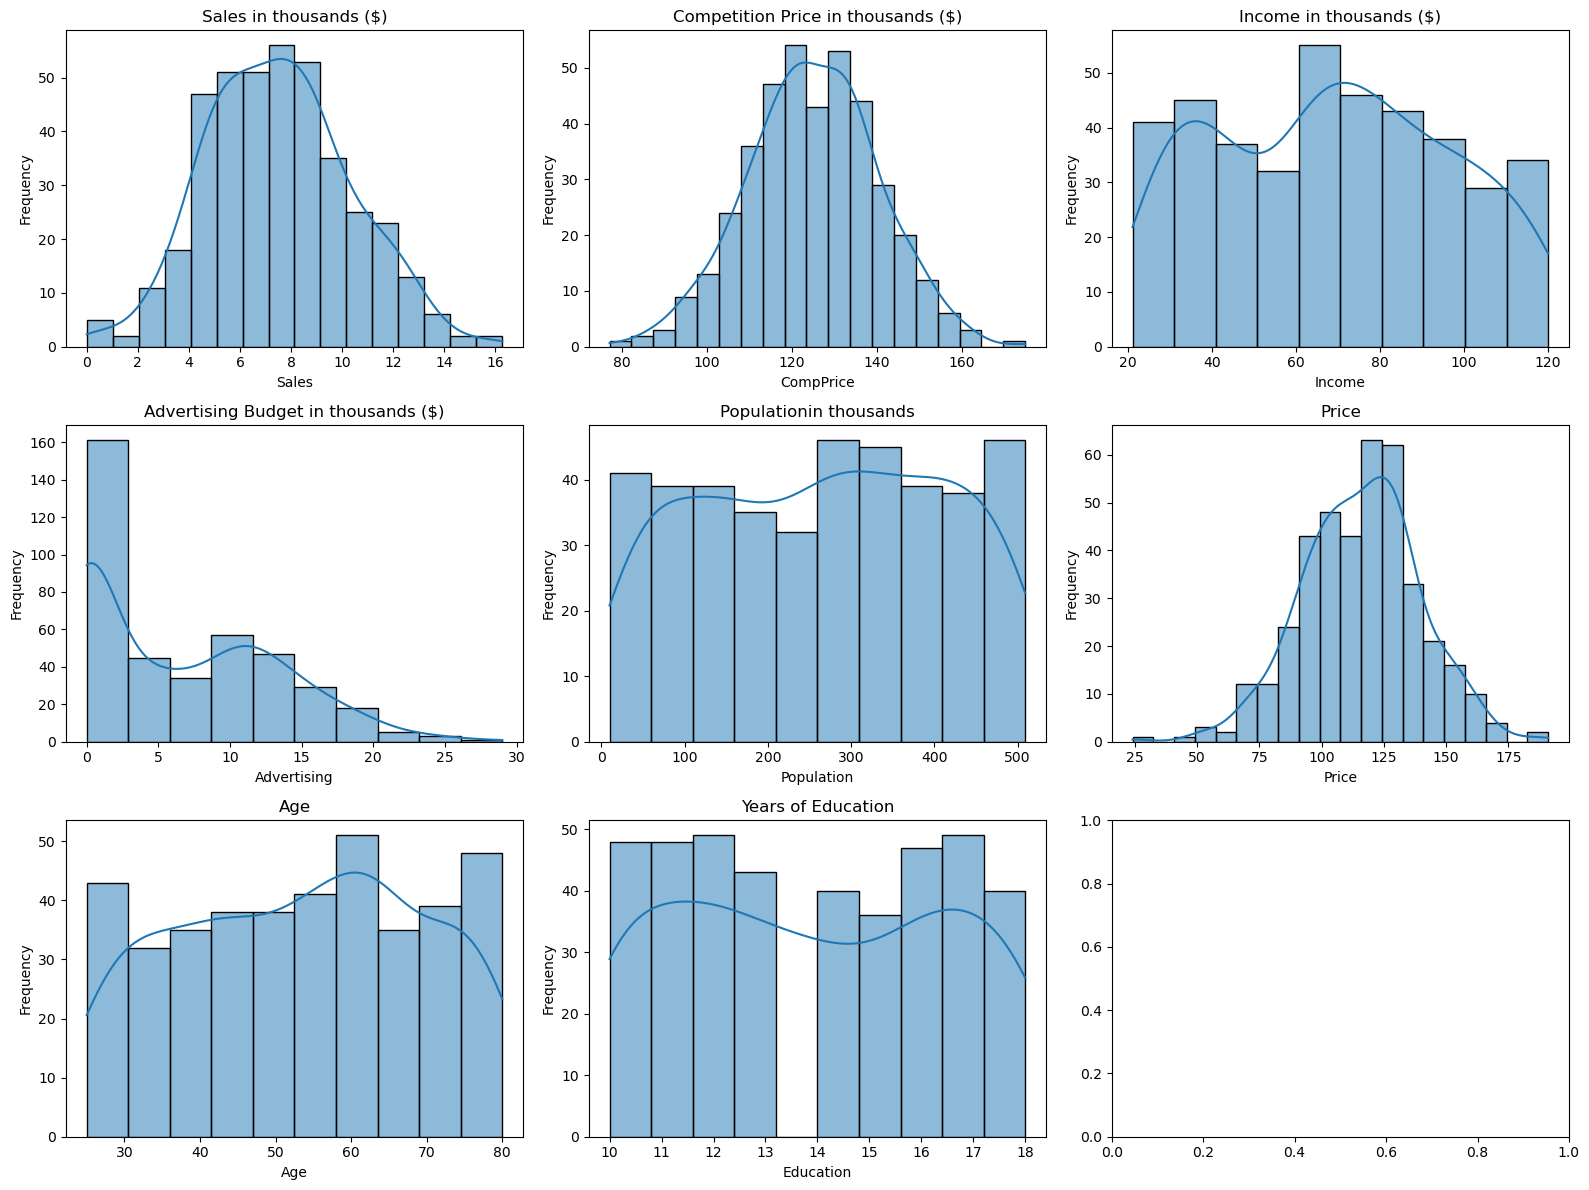

In [22]:
# Create a list of titles 
titles = [
    "Sales in thousands ($)", "Competition Price in thousands ($)", "Income in thousands ($)",
    "Advertising Budget in thousands ($)", "Populationin thousands", 
    "Price", "Age", "Years of Education"]

# Prepare the variables
histo_vars = numeric_variables

# Create a figure and axes for subplots
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.ravel()  # Flatten the axes array for easier indexing

for i, col in enumerate(histo_vars):
    sns.histplot(data=carseats_df, x=col, kde=True, ax=axes[i])
    
    # Set the title and labels
    axes[i].set_title(titles[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

**Histogram:**

For `Sales`, `CompPrice` and `Price`, the distribution is approximately normal (bell-shaped). However, Sales is slightly right skew and it would be the same for Price. For these three variables, there are no significant outliers. Income, Population, Age and Education have fairly uniform (flat) distribution. There are no significant outliers and they all have an irregular shape, lacking  a distinct central peak. Finally, Advertising is heavily right-skewed with most values concentrated near zero. It might have some potential outliers at higher advertising budgets.

**Income**, **Population**, **Age**, and **Education** display fairly uniform (flat) distributions. This indicates that the dataset covers diverse customer and regional profiles rather than being concentrated around specific values. The absence of strong peaks or outliers suggests consistent sampling across demographic and market factors.

**Advertising** stands out as heavily right-skewed, with most stores spending little on advertising and a few investing significantly higher amounts. These high-spend points could represent targeted marketing campaigns or larger stores with higher promotional budgets, which may have a disproportionate influence on sales performance.

### Box Plots

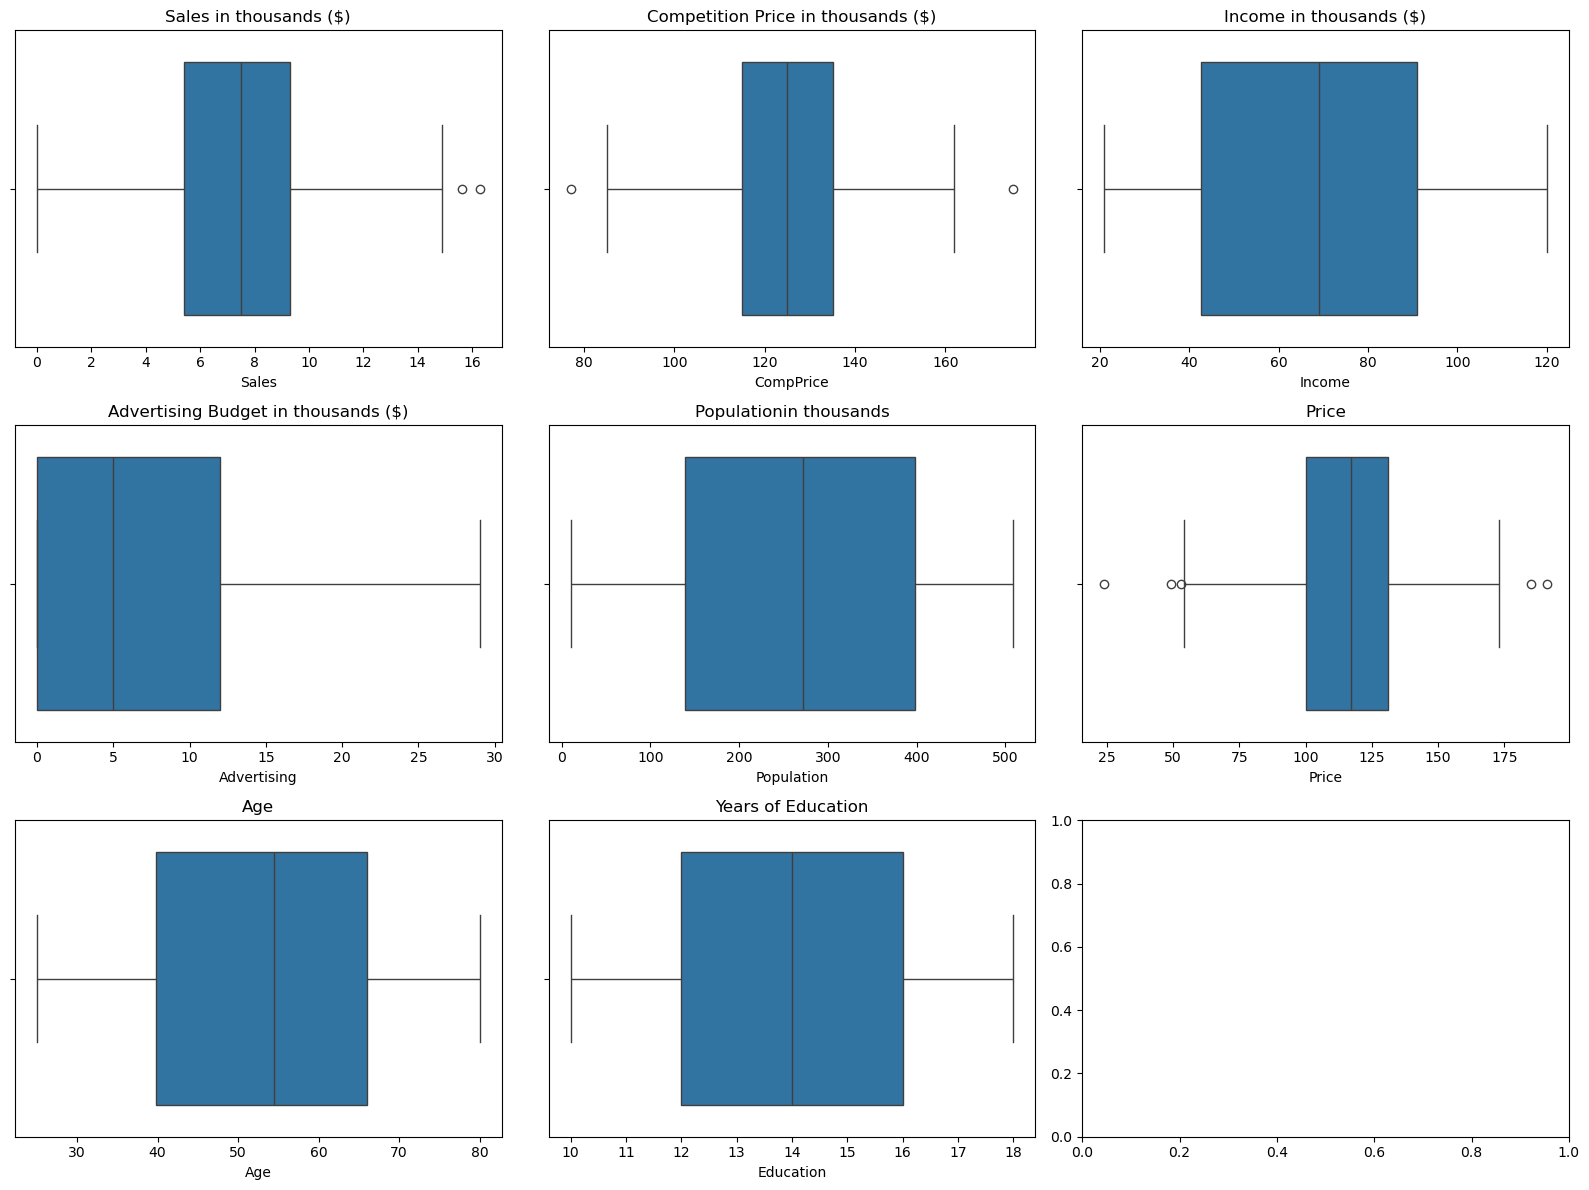

In [23]:
# Create a list of titles 
titles = [
    "Sales in thousands ($)", "Competition Price in thousands ($)", "Income in thousands ($)",
    "Advertising Budget in thousands ($)", "Populationin thousands", 
    "Price", "Age", "Years of Education"]
# Prepare the variables
box_vars = numeric_variables

# Create a figure and axes for subplots
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.ravel()  # Flatten the axes array for easier indexing

for i, col in enumerate(box_vars):
    sns.boxplot(data=carseats_df, x=col, ax=axes[i])
    
    # Set the title and labels
    axes[i].set_title(titles[i])
    axes[i].set_xlabel(col)
 

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

**Box Plot Interpretation**

Most numerical variables show fairly symmetric distributions with centered medians, indicating balanced and consistent data. **Advertising** is the main exception, displaying a strong right skew — most stores spend very little on advertising, while a few allocate significantly higher budgets. **Sales**, **CompPrice**, and **Price** include mild outliers that likely represent exceptional store performance or pricing strategies. Meanwhile, **Income**, **Population**, **Age**, and **Education** appear evenly distributed with no major outliers, suggesting a diverse and stable customer base across different regions.


### Bar Charts

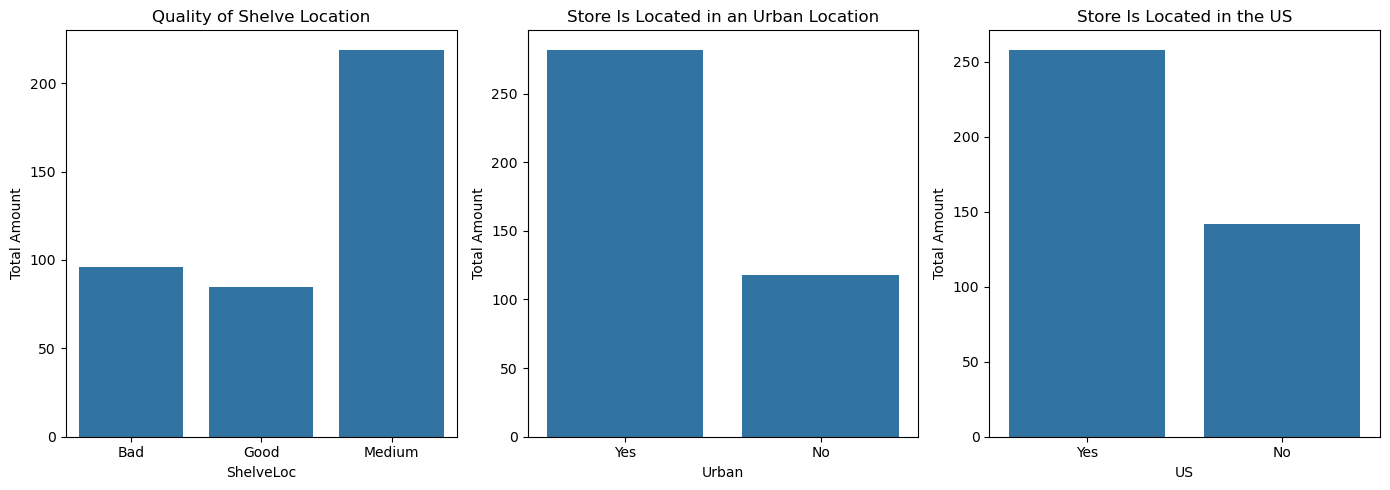

In [24]:
carseats_df = pd.read_csv('/Users/smileloukkade/Downloads/Concordia/MSCA 681/Datasets-20251004/Carseats.csv')

categorical_variables = ['ShelveLoc', 'Urban', 'US']

# Create a list of titles 
titles = ['Quality of Shelve Location', 'Store Is Located in an Urban Location', 'Store Is Located in the US']

# Bar charts for categorical counts
bar_vars = categorical_variables
fig, axes = plt.subplots(1, 3, figsize=(14, 5))  # Changed to 1 row, 3 columns
axes = axes.ravel()  # Flattens axes into a 1D array

for i, col in enumerate(bar_vars):
    sns.countplot(data=carseats_df, x=col, ax=axes[i])
    # Added colour and smoothened edges
    axes[i].set_title(titles[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Total Amount")

plt.tight_layout()
plt.show()

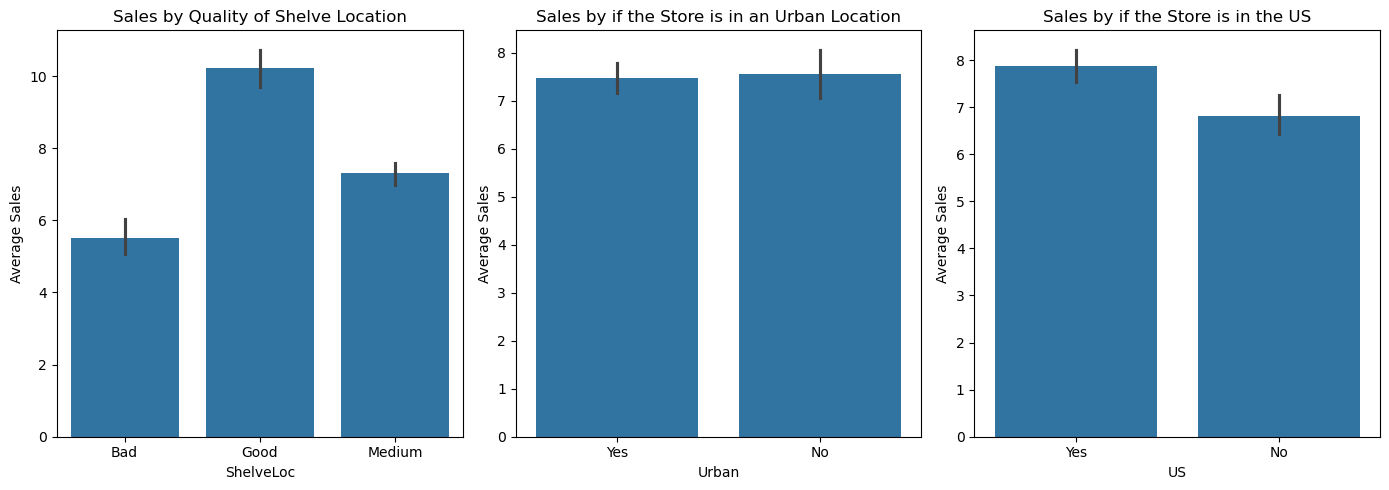

In [25]:
carseats_df = pd.read_csv('/Users/smileloukkade/Downloads/Concordia/MSCA 681/Datasets-20251004/Carseats.csv')
group_vars = [('ShelveLoc', 'Sales'), ('Urban', 'Sales'), ('US', 'Sales')]

# Create a list of titles 
titles = ["Sales by Quality of Shelve Location", "Sales by if the Store is in an Urban Location", "Sales by if the Store is in the US"]

# Bar charts for categorical counts
fig, axes = plt.subplots(1, 3, figsize=(14, 5)) 
axes = axes.ravel()  # Flattens axes into a 1D array

for i, (cat_col, num_col) in enumerate(group_vars):
    sns.barplot(data=carseats_df, x=cat_col, y=num_col, ax=axes[i])
    # Added colour and smoothened edges
    axes[i].set_title(titles[i])
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel("Average Sales")

plt.tight_layout()
plt.show()

### Scatterplots

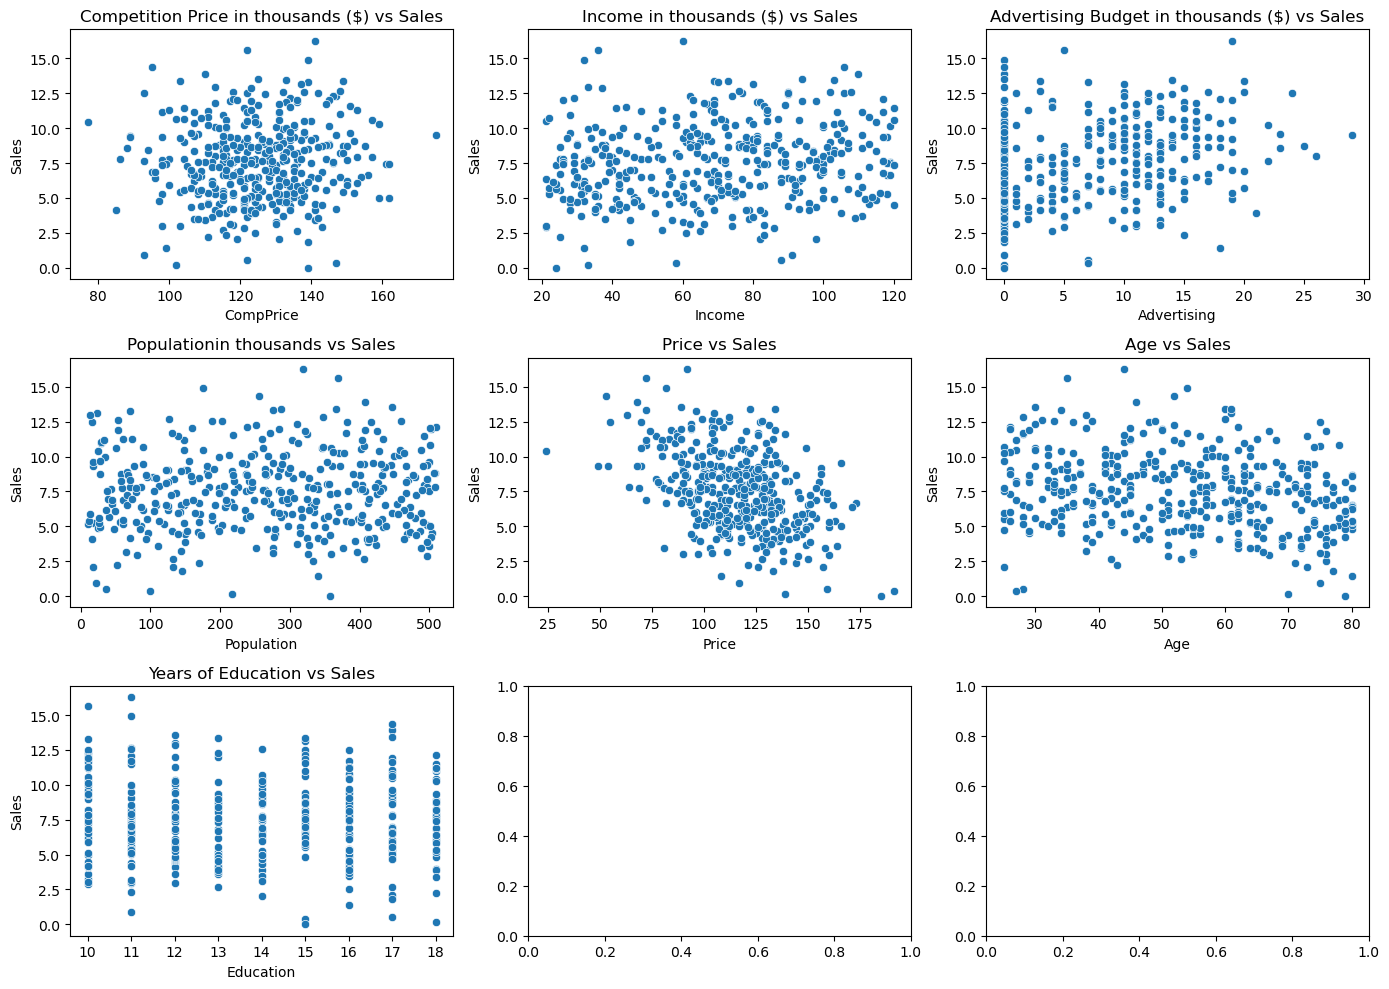

In [26]:
#Scatter charts (numerical vs sales)
#income #population #advertising #age #price
scatter_vars = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']
titles= [
  "Competition Price in thousands ($)", "Income in thousands ($)",
    "Advertising Budget in thousands ($)", "Populationin thousands", 
    "Price", "Age", "Years of Education"]

fig, axes = plt.subplots(3,3, figsize=(14,10))
axes = axes.ravel()

for i, col in enumerate(scatter_vars):
    sns.scatterplot(data=carseats_df, x=col, y='Sales', ax=axes[i])
    axes[i].set_title(f"{(titles[i])} vs Sales")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Sales")

plt.tight_layout()
plt.show()

## A.2: Examine relationships between numerical variables. Identify highly correlated variables with each other and with the target.

Goal is to discuss whether these variables should be dropped or not, considering the type of models you will use later.

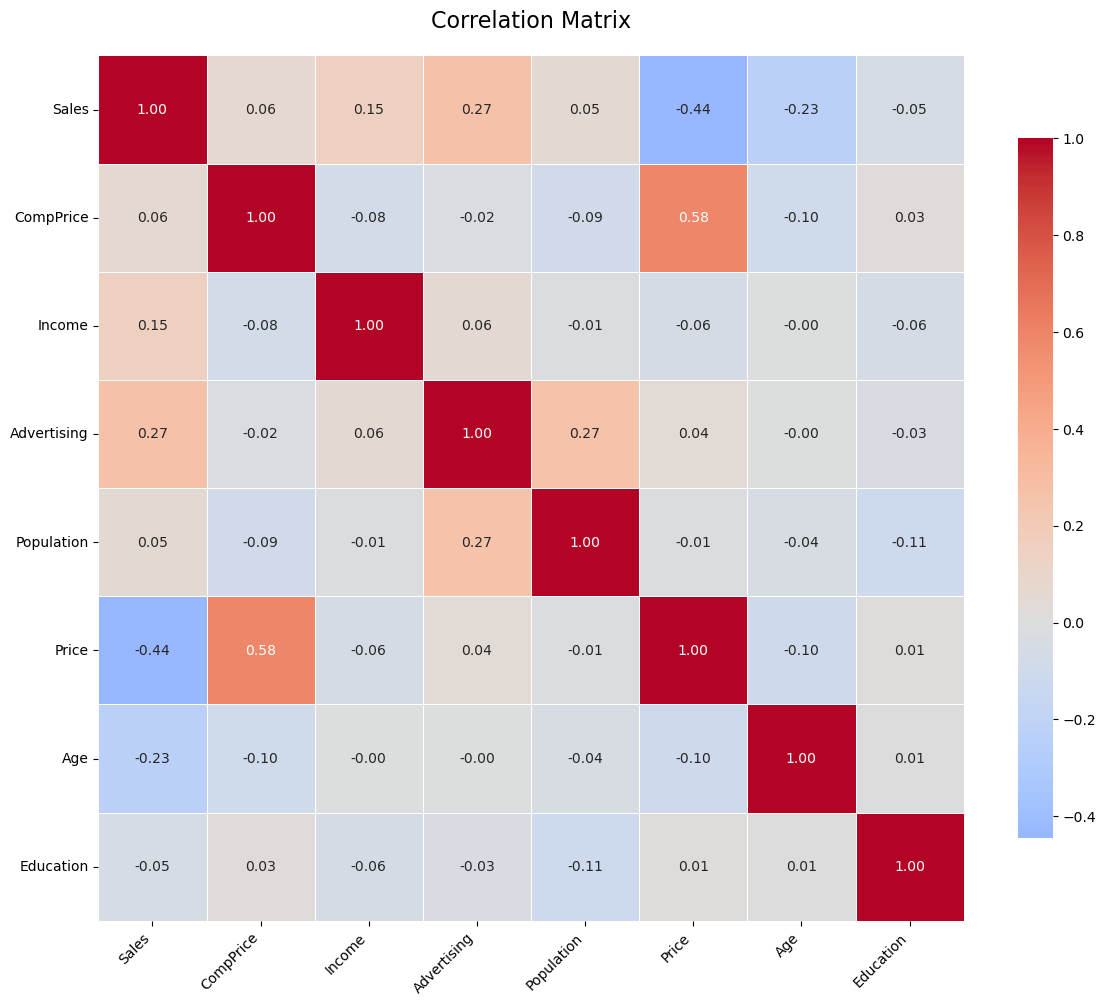

In [27]:
# Remove the unnamed variable
carseats_df = carseats_df.drop('Unnamed: 0', axis=1)

# Calculate the numerical variable correlation matrix for numeric columns only
corr_train = carseats_df.corr(numeric_only=True)

# Plot the correlation matrix with heatmap
plt.figure(figsize=(12, 10))  
sns.heatmap(corr_train,  
            annot=True,              
            cmap='coolwarm',         
            fmt='.2f',               
            square=True,             
            cbar_kws={"shrink": .8}, 
            linewidths=0.5,          
            center=0)                
plt.title('Correlation Matrix', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)               
plt.tight_layout()                   
plt.show()

The variable most highly correlated with `Sales`, our target, is `Price` with a correlation of -0.44, indicating that higher prices are associated with lower sales.

Among the variables, `CompPrice` and `Price` show the highest correlation at 0.58, suggesting that competitor prices and actual prices tend to move together. `Advertising` and `Population` (0.27) show a weak positive correlation. Overall, the correlation is not a significant concern in this dataset because there are no predictor pairs that exceed the 0.7 threshold.

## A.3: Convert categorical variables into numeric form using dummy variables.

In [45]:
carseats_df = pd.read_csv('/Users/smileloukkade/Downloads/Concordia/MSCA 681/Datasets-20251004/Carseats.csv')

# Let's one-hot encode our categorical variables
carseats_df = pd.get_dummies(carseats_df, columns=["ShelveLoc", "Urban", "US"], drop_first = True, dtype = 'int')

# With the new dummy variables
print(carseats_df.head(10))


   Unnamed: 0  Sales  CompPrice  Income  Advertising  Population  Price  Age  \
0           1   9.50        138      73           11         276    120   42   
1           2  11.22        111      48           16         260     83   65   
2           3  10.06        113      35           10         269     80   59   
3           4   7.40        117     100            4         466     97   55   
4           5   4.15        141      64            3         340    128   38   
5           6  10.81        124     113           13         501     72   78   
6           7   6.63        115     105            0          45    108   71   
7           8  11.85        136      81           15         425    120   67   
8           9   6.54        132     110            0         108    124   76   
9          10   4.69        132     113            0         131    124   76   

   Education  ShelveLoc_Good  ShelveLoc_Medium  Urban_Yes  US_Yes  
0         17               0                 0     

## A.4: Partition the data into a training set (60%), validation set (20%), and test set (20%) (set random_state=42).

In [46]:
from sklearn.model_selection import train_test_split

#Split the data into temp and test sets
temp_df, train_df = train_test_split(carseats_df, test_size=0.6, random_state=42)

#Split the data into train and validation sets
test_df, validation_df = train_test_split(temp_df, test_size=0.5, random_state=42)

#Print the shapes
print(f"Train set: {train_df.shape[0]}")
print(f"Validation shape: {validation_df.shape[0]}")
print(f"Test shape: {test_df.shape[0]}")

Train set: 240
Validation shape: 80
Test shape: 80


# **B. Train a Random Forest Regressor to predict Sales**

## B.1 What are the hyper parameters of this model that can be tuned? 

In [47]:
import sklearn
print(sklearn.__version__)

1.6.1


That is, specifically the ones that actually affect model performance rather than adjust particular settings that do not have a direct influence over the model (as relevant for this assignment). Based on the scikit-learn documentation (for version 1.7.2, as per the output above confirming the current version), the following hyperparameters can be tuned:

* **`n_estimators`**: the number of trees in the forest
* **`criterion`**: the function to measure the quality of a split
* **`max_depth`**: the maximum depth of the tree
* **`min_samples_split`**: the minimum number of samples required to split an internal node
* **`min_samples_leaf`**: the minimum number of samples required to be at a leaf node
* **`max_features`**: the number of features to consider when looking for the best split
* **`max_leaf_nodes`**: grow trees with max_leaf_nodes in best-first fashion
* **`bootstrap`**: whether bootstrap samples are used when building trees
* **`max_samples`** (only if `bootstrap=True`): the number of samples to draw from X to train each base estimator

## B.2: Tune at least two hyperparameters using cross validation.

In [48]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import random

# Separate predictors (X) and target (y)
X_train = train_df.drop("Sales", axis=1)
y_train = train_df["Sales"]

X_validation = validation_df.drop("Sales", axis=1)
y_validation = validation_df["Sales"]

X_test = test_df.drop("Sales", axis=1)
y_test = test_df["Sales"]

# Create the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameters to tune
# Reduced parameter grid to make the search faster and less memory-intensive
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': list(range(3, 10, 1)),      
    'min_samples_leaf': [0.01, 0.02],
    'max_features': [0.3, 0.5, 0.8, 'sqrt', 'log2']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator = rf,
    param_grid = param_grid,
    cv = 5,
    scoring = 'neg_mean_absolute_error',
    n_jobs = -1,  # You might want to reduce this if memory issues persist
    verbose = 1,  # Increased verbosity to monitor progress
    return_train_score = True
)

# Fit the grid search on the training data
random.seed(42)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_rf = grid_search.best_estimator_

# Display the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits
Best hyperparameters: {'max_depth': 9, 'max_features': 0.8, 'min_samples_leaf': 0.01, 'n_estimators': 300}


We fine-tuned the Random Forest Regressor using grid search with 5-fold cross-validation, testing 210 different hyperparameter combinations (1050 total model fits). The winning setup used 300 trees with a maximum depth limit of 9 levels, requiring each tree to consider 80% of all predictors when choosing a split, and each leaf to contain at least 1% of all training samples. 

More specifically, the output of the grid search shows:
* **`'n_estimators'`: 300**: We used 300 trees in our forest. The higher number of trees is likely to result in smoother, more stable predictions (and therefore less variance). 
* **`'max_depth'`: np.int64(9)**: Each decision tree in the forest can grow to a maximum of 9 levels deep. This number is not overly shallow (which would underfit), but also not unlimited (which can overfit).
* **`'min_samples_leaf'`: 0.01**: This means a leaf must contain at least 1% of all training samples. Since our training set had 240 observations, each leaf would need to have at least 2-3 data points.
* **`'max_features'`: 0.8**: Each tree considers 80% of all predictors when choosing a split. Using 80% instead of 100% means each tree is diverse enough to contribute unique information to the ensemble.

## B.3: Evaluate the performance of the model on the validation and test sets using MAE and RMSE.

In [49]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

# Predict on validation and test sets
y_val_pred = best_rf.predict(X_validation)
y_test_pred = best_rf.predict(X_test)

# Validation set
mae_val_rf = mean_absolute_error(y_validation, y_val_pred)
rmse_val_rf = root_mean_squared_error(y_validation, y_val_pred)

# Test set
mae_test_rf = mean_absolute_error(y_test, y_test_pred)
rmse_test_rf = root_mean_squared_error(y_test, y_test_pred)

print("Evaluate the model on the validation and test sets:")
print("Validation Set Performance:")
print(f"  MAE:  {mae_val_rf:.3f}")
print(f"  RMSE: {rmse_val_rf:.3f}")
print("\nTest Set Performance:")
print(f"  MAE:  {mae_test_rf:.3f}")
print(f"  RMSE: {rmse_test_rf:.3f}")

Evaluate the model on the validation and test sets:
Validation Set Performance:
  MAE:  1.299
  RMSE: 1.725

Test Set Performance:
  MAE:  1.520
  RMSE: 1.854


The target variable `Sales` represents unit sales in thousands. Accordingly, the MAE of 1.299 and RMSE of 1.725 on the validation set correspond to average prediction errors of approximately ~1,300 to ~1,700 units per store. On the test set, performance remained similar (MAE = 1.520, RMSE = 1.854), indicating that the model generalizes well to unseen data with only a modest increase in error. These results suggest the model predicts sales with relatively high accuracy given the available features.

## B.4: Use the feature_importance_ values to determine which variables are the most important. Comment on the top 3 predictors. 

/var/folders/3r/2rpxgc855_j0rx6pms6fvgtr0000gn/T/ipykernel_33959/2232336507.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances_rf.head(10), palette='crest')


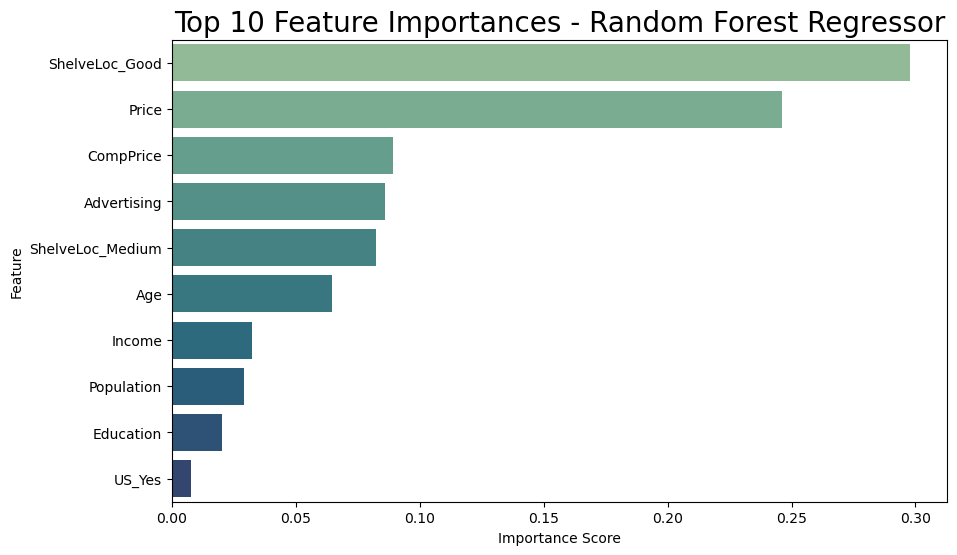

Top 3 Most Important Predictors:
          Feature  Importance
8  ShelveLoc_Good    0.297834
5           Price    0.245946
1       CompPrice    0.089268


In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get feature importances from the tuned Random Forest model
importances = best_rf.feature_importances_

# Create a DataFrame for visualization
feature_importances_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances})
feature_importances_rf = feature_importances_rf[feature_importances_rf['Feature'] != 'Unnamed: 0']

# Sort the DataFrame by importance
feature_importances_rf = feature_importances_rf.sort_values(by='Importance', ascending=False)

# Plot the top 10 features
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_rf.head(10), palette='crest')
plt.title('Top 10 Feature Importances - Random Forest Regressor', fontsize = 20)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Display the top 3 predictors
print("Top 3 Most Important Predictors:")
print(feature_importances_rf.head(3))

The Random Forest Regressor indicates that `ShelveLoc_Good`, `Price`, and `CompPrice` are the three most influential predictors of sales performance.
* **`ShelveLoc_Good` (importance = 0.298)**: Stores with a good shelf location for their product display have significantly higher sales, confirming that in-store visibility and product placement play a central role in driving customer purchases (this is validated by marketing theory which suggests that better placement increases impulse buying and perceived product quality).

* **`Price` (importance = 0.246)**: Price was the second most important variable, showing the expected negative relationship between price and sales (as confirmed by the correlation matrix). Customers in this retail environment are clearly price-sensitive, so competitive pricing directly influences their buying decisions.

* **`CompPrice` (importance = 0.089)**: The price charged by competing stores also influenced sales, though to a lesser extent than a store’s own pricing strategy. This suggests that monitoring competitor pricing remains an important consideration in maintaining sales performance at each location. 

# **C. Train a Gradient Boosting Regressor to predict Sales.**

## C.1 Tuning Hyperparameters for Model Optimization (from scikitlearn).

Tuned key hyperparameters of the Gradient Boosting Regressor to improve prediction accuracy — in other words, those that directly affect model performance rather than simply control peripheral behavior or computational settings (for example, `random_state`). Based on the scikit-learn documentation (version 1.7.2), the following hyperparameters are relevant for tuning in this assignment:

* **`n_estimators`**: the number of boosting stages to perform
* **`learning_rate`**: shrinks the contribution of each tree by `learning_rate`
* **`max_depth`**: maximum depth of the individual regression estimators (the maximum depth limits the number of nodes in the tree)
* **`min_samples_split`**: the minimum number of samples required to split an internal node
* **`min_samples_leaf`**: the minimum number of samples required to be at a leaf node
* **`subsample`**: the fraction of samples to be used for fitting the individual base learners
* **`max_features`**: the number of features to consider when looking for the best split
* **`loss`**: loss function to be optimized (e.g., `squared_error`, `absolute_error`, `huber`, `quantile`).
* **`criterion`**: the function to measure the quality of a split


## C.2: Tune at least two hyperparameters using cross validation.

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
import random

gbr = GradientBoostingRegressor(random_state=42)

param_grid_gb = {
    'n_estimators': [100, 200, 300],       
    'max_depth': list(range(2, 6, 1)),       
    'learning_rate': [0.01, 0.1, 0.2],
    'min_samples_leaf': [0.01, 0.1, 0.2],
    'max_features': [0.1, 0.5, 0.8, 'sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid_gb,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1,
    return_train_score=True
)

random.seed(42)
grid_search.fit(X_train, y_train)

best_gbr = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 2, 'max_features': 0.8, 'min_samples_leaf': 0.01, 'n_estimators': 200}


We fine-tuned the Gradient Boosting Regressor using grid search with 5-fold cross-validation, testing 540 different hyperparameter combinations (for a total of 2,700 model fits). The best configuration used 200 trees, each limited to a maximum depth of 2 levels, and allowed each split to consider 80% of all predictors. Each leaf was required to contain at least 1% of the training samples, with a learning rate of 0.1 to control how much each tree contributed to the final model.

More specifically, the grid search identified the following optimal parameters:

* **`n_estimators`: 200**: The model used 200 boosting stages (trees). This is a moderate number that balances performance and computation time, helping the ensemble generalize without excessive complexity.
* **`max_depth`: 2**: Each individual tree was restricted to a depth of two levels. Shallow trees like these help prevent overfitting and ensure that the model captures simple, generalizable relationships.
* **`learning_rate`: 0.1**: This parameter controls how much each tree corrects the previous one’s errors. A value of 0.1 provides a good trade-off between learning stability and convergence speed.
* **`min_samples_leaf`: 0.01**: Each terminal leaf must contain at least 1% of the training data. With 240 observations, that means each leaf includes at least 2-3 samples.
* **`max_features`: 0.8**: Each tree considered 80% of all predictors when searching for the best split. This introduces diversity across trees and reduces correlation between them to improve overall performance.

## C.3: Evaluate the model on the validation and test sets using MAE and RMSE.

In [52]:

# Predictions
y_pred_val = best_gbr.predict(X_validation)
y_pred_test = best_gbr.predict(X_test)

# MAE
mae_val_gb = mean_absolute_error(y_validation, y_pred_val)
mae_test_gb = mean_absolute_error(y_test, y_pred_test)

# RMSE
rmse_val_gb = root_mean_squared_error(y_validation, y_pred_val)
rmse_test_gb = root_mean_squared_error(y_test, y_pred_test)

# Display the results
print("Evaluate the model on the validation and test sets:")
print("Validation Set Performance:")
print(f"  MAE:  {mae_val_gb:.3f}")
print(f"  RMSE: {rmse_val_gb:.3f}")
print("\nTest Set Performance:")
print(f"  MAE:  {mae_test_gb:.3f}")
print(f"  RMSE: {rmse_test_gb:.3f}")

Evaluate the model on the validation and test sets:
Validation Set Performance:
  MAE:  1.128
  RMSE: 1.392

Test Set Performance:
  MAE:  1.190
  RMSE: 1.460


The target variable `Sales` represents unit sales in thousands. Accordingly, the MAE of 1.128 and RMSE of 1.392 on the validation set correspond to average prediction errors of roughly 1,100 to 1,400 units per store. On the test set, performance remained consistent (MAE = 1.190, RMSE = 1.460), suggesting that the model generalizes effectively to unseen data with only a slight increase in error. Overall, these results indicate that the Gradient Boosting Regressor achieves strong predictive accuracy by capturing most of the variability in sales given the available features.

## C.4: Use the feature_importance_ values to determine which variables are the most important. Comment on the top 3 predictors. 

/var/folders/3r/2rpxgc855_j0rx6pms6fvgtr0000gn/T/ipykernel_33959/2902120090.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


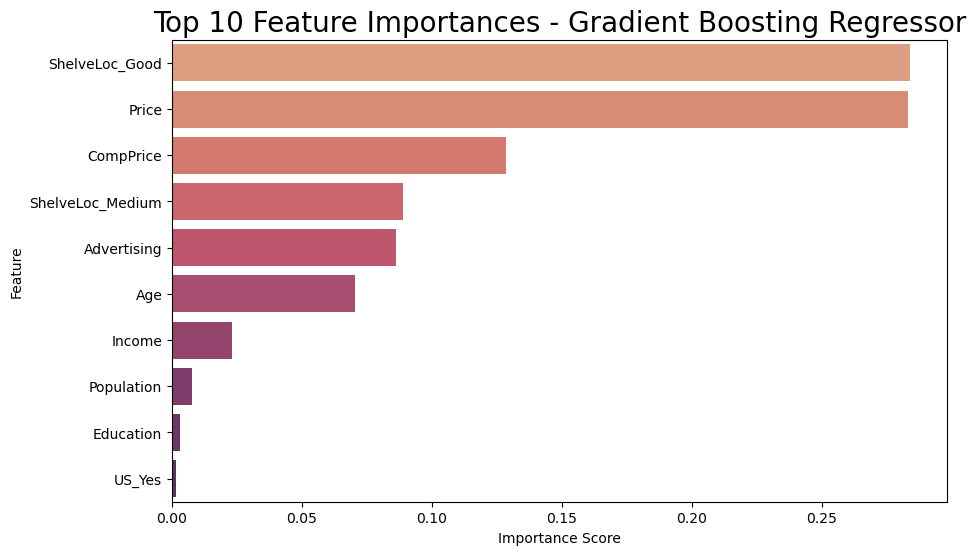

Top 3 Most Important Predictors:
          Feature  Importance
8  ShelveLoc_Good    0.284006
5           Price    0.283175
1       CompPrice    0.128441


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = best_gbr.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
feature_importance_df = feature_importance_df[feature_importance_df['Feature'] != 'Unnamed: 0']

# Plot the top 10 features
plt.figure(figsize=(10,6))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=feature_importance_df.head(10), 
    palette='flare'
)
plt.title('Top 10 Feature Importances - Gradient Boosting Regressor', fontsize=20)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Display the top 3 predictors
print("Top 3 Most Important Predictors:")
print(feature_importance_df.head(3))

The Gradient Boosting Regressor indicates that `ShelveLoc_Good`, `Price`, and `CompPrice` are the three most influential predictors of sales performance.

* **`ShelveLoc_Good` (importance = 0.284)**: Stores with a good shelf location for their product display have significantly higher sales. This confirms that product visibility and placement remain powerful drivers of consumer behavior—better shelf positions make products more noticeable and accessible, which increases impulse purchases and perceived quality.

* **`Price` (importance = 0.283)**: Price ranked as the second most important factor, showing the expected negative relationship between price and sales (as also supported by the correlation analysis). Customers in this dataset appear price-sensitive, meaning that even small price differences can strongly influence purchasing choices.

* **`CompPrice` (importance = 0.128)**: Competitors’ pricing also plays a meaningful (though smaller) role in determining sales. We can conclude that while internal pricing strategy is more influential, maintaining awareness of competitor prices is also a key part of sustaining a competitive edge.

# D. Compare the two models

## D.1 Create a table comparing `MAE`, `RMSE` for both models on validation and test sets

B3: Train a `Random Forest Regressor` to predict sales

**Validation Set Performance**
    `MAE`: 1.299
    `RMSE`: 1.725

**Test Set Performance**
    `MAE`: 1.520
    `RMSE`: 1.854
    

C3: Train a `Gradient Boosting Regressor` to predict sales

**Validation Set Performance**
    `MAE`: 1.128
    `RMSE`: 1.392

**Tes Set Performance**
    `MAE`: 1.190
    `RMSE`: 1.460
    


In [54]:
import pandas as pd

# Create dataframe for comparing MAE and RMSE
model_comparison = pd.DataFrame({
    'Model' : ['Random Forest', 'Gradient Boosting'],
    'MAE (Validation)' : [mae_val_rf, mae_val_gb],
    'RMSE (Validation)' : [rmse_val_rf, rmse_val_gb],
    'MAE (Test)' : [mae_test_rf, mae_test_gb],
    'RMSE (Test)' : [rmse_test_rf, rmse_test_gb]
})

# Table named "Model", explaining data as index
model_comparison.set_index('Model', inplace = True) 
# use set_index because we want to use the "Model" column as the row lables instead of default numbers
# use inplace = true to modify the original one, instead of creating a new one

# Print the table
model_comparison.round(3) #show only 3 decimals

,MAE (Validation),RMSE (Validation),MAE (Test),RMSE (Test)
Model,,,,
Random Forest,1.299,1.725,1.52,1.854
Gradient Boosting,1.128,1.392,1.19,1.460


# D.2 Discuss which model performed better and why

**1. Discussion which model perform better**

The Gradient Boosting Regressor performed better than the Random Forest model on both validation and test sets.
Validation: MAE = 1.128 vs 1.299, RMSE = 1.392 vs 1.725
Test: MAE = 1.190 vs 1.520, RMSE = 1.460 vs 1.854
These results show that Gradient Boosting produced smaller prediction errors and therefore higher predictive accuracy.

**2. Why `Gradient Boosting perform` better**

First, for predicting sales, lower MAE and RMSE values indicate higher accuracy. On unseen test data, the Gradient Boosting model’s errors (MAE = 1.190, RMSE = 1.460) are substantially lower than the Random Forest’s (MAE = 1.520, RMSE = 1.854), confirming stronger predictive performance.

Second, to check for overfitting, we compare training performance with validation and test results. The Random Forest model’s training MAE (≈ 0.92) is much lower than its validation (1.299) and test (1.520) errors, showing that it fits the training data too closely and generalizes less effectively. In contrast, the Gradient Boosting Regressor’s training MAE (≈ 1.09) is close to its validation (1.128) and test (1.190) errors, indicating better generalization and more stable performance on unseen data.

# E. Perform error analysis by sales segment using the best model


## E.1 Sort the validation set by predicted sales values and split the records into quartiles.

In [55]:
# Existing Validation set
X_validation.head()

,Unnamed: 0,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
52,53,153,40,3,112,129,39,18,0,0,1,1
241,242,136,63,0,160,94,38,12,0,1,1,0
308,309,126,80,19,436,126,52,10,0,1,1,1
356,357,142,109,0,111,164,72,12,1,0,1,0
259,260,123,36,10,467,100,74,11,0,0,0,1


In [56]:
# This is the best model we chose "Gradient Boosting Regressor Model"
y_pred_val = best_gbr.predict(X_validation) #From C3
validation_results = X_validation.copy()
validation_results.head(10)


,Unnamed: 0,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
52,53,153,40,3,112,129,39,18,0,0,1,1
241,242,136,63,0,160,94,38,12,0,1,1,0
308,309,126,80,19,436,126,52,10,0,1,1,1
356,357,142,109,0,111,164,72,12,1,0,1,0
259,260,123,36,10,467,100,74,11,0,0,0,1
95,96,134,25,10,237,148,59,13,0,1,1,1
34,35,115,54,0,406,128,42,17,0,1,1,1
47,48,126,98,0,173,108,55,16,0,0,1,0
205,206,113,22,1,317,132,28,12,0,1,1,0
149,150,121,120,13,140,87,56,11,0,1,1,1


In [57]:
## Combine actuals and predictions into a dataframe

validation_results['Actual_sales'] = y_validation.values
validation_results['Predicted_sales'] = y_val_pred

validation_results = validation_results.sort_values(by ='Predicted_sales').reset_index(drop=True)

validation_results.head(10)

,Unnamed: 0,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes,Actual_sales,Predicted_sales
0,329,117,66,1,65,111,55,11,0,0,1,1,3.15,4.547163
1,52,121,90,0,150,108,75,16,0,0,1,0,4.42,4.661864
2,100,121,47,3,220,107,56,16,0,0,0,1,4.88,5.064816
3,63,139,45,0,146,133,77,17,0,0,1,1,1.82,5.066559
4,243,124,46,0,199,135,52,14,0,1,0,0,4.68,5.183816
5,129,133,100,3,350,126,55,13,0,0,1,1,4.96,5.288291
6,359,123,96,10,71,118,69,11,0,0,1,1,4.17,5.290590
7,66,122,26,0,197,128,55,13,0,1,0,0,4.90,5.355429
8,35,115,54,0,406,128,42,17,0,1,1,1,2.67,5.537330
9,206,113,22,1,317,132,28,12,0,1,1,0,5.68,5.629858


In [58]:
# Split data into four groups (Quartile)
validation_results['Quartile'] = pd.qcut(
    validation_results['Predicted_sales'],
    q = 4,
    labels = ["Q1 (low)", "Q2", "Q3","Q4 (high)"])

validation_results.head(5)

,Unnamed: 0,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes,Actual_sales,Predicted_sales,Quartile
0,329,117,66,1,65,111,55,11,0,0,1,1,3.15,4.547163,Q1 (low)
1,52,121,90,0,150,108,75,16,0,0,1,0,4.42,4.661864,Q1 (low)
2,100,121,47,3,220,107,56,16,0,0,0,1,4.88,5.064816,Q1 (low)
3,63,139,45,0,146,133,77,17,0,0,1,1,1.82,5.066559,Q1 (low)
4,243,124,46,0,199,135,52,14,0,1,0,0,4.68,5.183816,Q1 (low)


## E2. For each quartile, calculate the MAE between actual and predicted sales.


In [59]:
def mae_group(group):
    return mean_absolute_error(group['Actual_sales'], group['Predicted_sales'])

# Group by quartile and calculate MAE
mae_by_quartile = validation_results.groupby('Quartile').apply(mae_group).reset_index()
mae_by_quartile.columns = ['Quartile', 'MAE']

mae_by_quartile

/var/folders/3r/2rpxgc855_j0rx6pms6fvgtr0000gn/T/ipykernel_33959/3366034185.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mae_by_quartile = validation_results.groupby('Quartile').apply(mae_group).reset_index()
/var/folders/3r/2rpxgc855_j0rx6pms6fvgtr0000gn/T/ipykernel_33959/3366034185.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mae_by_quartile = validation_results.groupby('Quartile').apply(mae_group).reset_index()


,Quartile,MAE
0,Q1 (low),1.179516
1,Q2,1.286134
2,Q3,1.432544
3,Q4 (high),1.296765


## E3. Create a table showing quartile ranges, MAE, and the number of records in each quartile.

In [60]:
# Add record count per quartile
count_by_quartile = (
    validation_results
    .groupby('Quartile')
    .size()
    .reset_index(name='Record_Count')
)

# Quartile ranges (numeric min & max of Predicted_sales)
quartile_ranges = (
    validation_results
    .groupby('Quartile')['Predicted_sales']
    .agg(['min','max'])
    .reset_index()
)

# Merge results
summary_table = (
    mae_by_quartile
    .merge(count_by_quartile, on='Quartile')
    .merge(quartile_ranges, on='Quartile')
)

# Create a string column like [min - max]
summary_table['Range'] = summary_table.apply(
    lambda row: f"[{row['min']:.3f} - {row['max']:.3f}]", axis=1
)

# Drop the separate min/max columns if you only want Range
summary_table = summary_table.drop(columns=['min','max'])

summary_table


/var/folders/3r/2rpxgc855_j0rx6pms6fvgtr0000gn/T/ipykernel_33959/1927473938.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Quartile')
/var/folders/3r/2rpxgc855_j0rx6pms6fvgtr0000gn/T/ipykernel_33959/1927473938.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Quartile')['Predicted_sales']


,Quartile,MAE,Record_Count,Range
0,Q1 (low),1.179516,20,[4.547 - 6.014]
1,Q2,1.286134,20,[6.026 - 6.958]
2,Q3,1.432544,20,[7.034 - 8.436]
3,Q4 (high),1.296765,20,[8.472 - 11.742]


## E4. Comment on which quartiles have the lowest and highest errors and explain why the model may perform better in certain sales ranges

**Summary**

**Lowest vs. Highest Error**

- **Lowest error**: Q1 (low sales) → MAE ≈ **1.18**
- **Highest error**: Q3 (mid–high sales) → MAE ≈ **1.43**

The model predicts most accurately for stores in the lowest quartile of sales (Q1) and performs worst in the mid–high quartile (Q3). This indicates that the model captures patterns for low-volume stores more effectively, likely because these stores follow more stable and consistent sales trends with less fluctuation.

However, when comparing all quartiles with the model’s overall test MAE (≈ **1.19**), Q2 and Q3 have MAE values closest to this average. This means the model performs most consistently in the middle sales ranges, where data density is higher and relationships between predictors and sales are more balanced.

In contrast, the extreme ranges (Q1 and Q4) show greater variation because sales in those groups are influenced by unique or irregular factors such as **promotional campaigns**, **location-specific effects**, or **sudden demand shifts**, which are harder for the model to generalize.

Overall, the model performs best in stable, mid-range sales environments (Q2–Q3) where patterns are smoother and less affected by external volatility.